In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import warnings
import numpy as np
warnings.filterwarnings('ignore')
from datetime import datetime
import random 


In [2]:

all_files = glob.glob("Data/*.csv")                         #reads all csv files in the same folder
df = pd.concat((pd.read_csv(f,sep=';') for f in all_files))
df.index = pd.to_datetime(df.index)
df

timestamp  customer_no  location
1970-01-01 00:00:00.000000000  2019-09-03 07:02:00            1     fruit
1970-01-01 00:00:00.000000001  2019-09-03 07:02:00            2    drinks
1970-01-01 00:00:00.000000002  2019-09-03 07:03:00            3     dairy
1970-01-01 00:00:00.000000003  2019-09-03 07:05:00            1    drinks
1970-01-01 00:00:00.000000004  2019-09-03 07:06:00            4     dairy
...                                            ...          ...       ...
1970-01-01 00:00:00.000005120  2019-09-06 21:50:00         1500     dairy
1970-01-01 00:00:00.000005121  2019-09-06 21:50:00         1507  checkout
1970-01-01 00:00:00.000005122  2019-09-06 21:50:00         1508  checkout
1970-01-01 00:00:00.000005123  2019-09-06 21:50:00         1509    drinks
1970-01-01 00:00:00.000005124  2019-09-06 21:50:00         1510    spices

[24877 rows x 3 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24877 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000005124
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    24877 non-null  object
 1   customer_no  24877 non-null  int64 
 2   location     24877 non-null  object
dtypes: int64(1), object(2)
memory usage: 777.4+ KB


In [4]:
df['timestamp']=pd.to_datetime(df['timestamp'])
df['year']= df['timestamp'].dt.year               #extracts year from timestamp
df['month']= df['timestamp'].dt.month             #extracts month from timestamp
df['week']= df['timestamp'].dt.week               #extracts week from timestamp
df['weekday']= df['timestamp'].dt.weekday         #extracts weekday from timestamp
df['day']= df['timestamp'].dt.day                 #extracts day from timestamp
df['hour']= df['timestamp'].dt.hour               #extracts hour from timestamp
df['minutes']= df['timestamp'].dt.minute          #extracts minutes from timestamp
df['seconds']= df['timestamp'].dt.second          #extracts seconds from timestamp

#replacing weekday number with weekday name
df.loc[df["weekday"] == 0, "weekday"] = 'monday'   
df.loc[df["weekday"] == 1, "weekday"] = 'tuesday'
df.loc[df["weekday"] == 2, "weekday"] = 'wednesday'
df.loc[df["weekday"] == 3, "weekday"] = 'thursday'
df.loc[df["weekday"] == 4, "weekday"] = 'friday'

df = df.sort_values(['timestamp'])

In [5]:
df.head()

timestamp  customer_no location  year  \
1970-01-01 00:00:00.000000001 2019-09-02 07:03:00            2    dairy  2019   
1970-01-01 00:00:00.000000000 2019-09-02 07:03:00            1    dairy  2019   
1970-01-01 00:00:00.000000002 2019-09-02 07:04:00            3    dairy  2019   
1970-01-01 00:00:00.000000007 2019-09-02 07:04:00            8    fruit  2019   
1970-01-01 00:00:00.000000003 2019-09-02 07:04:00            4    dairy  2019   

                               month  week weekday  day  hour  minutes  \
1970-01-01 00:00:00.000000001      9    36  monday    2     7        3   
1970-01-01 00:00:00.000000000      9    36  monday    2     7        3   
1970-01-01 00:00:00.000000002      9    36  monday    2     7        4   
1970-01-01 00:00:00.000000007      9    36  monday    2     7        4   
1970-01-01 00:00:00.000000003      9    36  monday    2     7        4   

                               seconds  
1970-01-01 00:00:00.000000001        0  
1970-01-01 00:00:00.000000000        0  
1970-01-01 00:00:00.000000002        0  
1970-01-01 00:00:00.000000007        0  
1970-01-01 00:00:00.000000003        0

**Calculate the total number of customers in each section**

In [6]:
total_customers = pd.DataFrame(df.groupby(['timestamp','location','weekday'])['customer_no'].count()).reset_index()

In [7]:
total_customers

timestamp  location weekday  customer_no
0     2019-09-02 07:03:00     dairy  monday            2
1     2019-09-02 07:04:00     dairy  monday            2
2     2019-09-02 07:04:00     fruit  monday            1
3     2019-09-02 07:04:00    spices  monday            3
4     2019-09-02 07:05:00  checkout  monday            2
...                   ...       ...     ...          ...
13834 2019-09-06 21:50:00  checkout  friday            2
13835 2019-09-06 21:50:00     dairy  friday            1
13836 2019-09-06 21:50:00    drinks  friday            1
13837 2019-09-06 21:50:00     fruit  friday            1
13838 2019-09-06 21:50:00    spices  friday            1

[13839 rows x 4 columns]

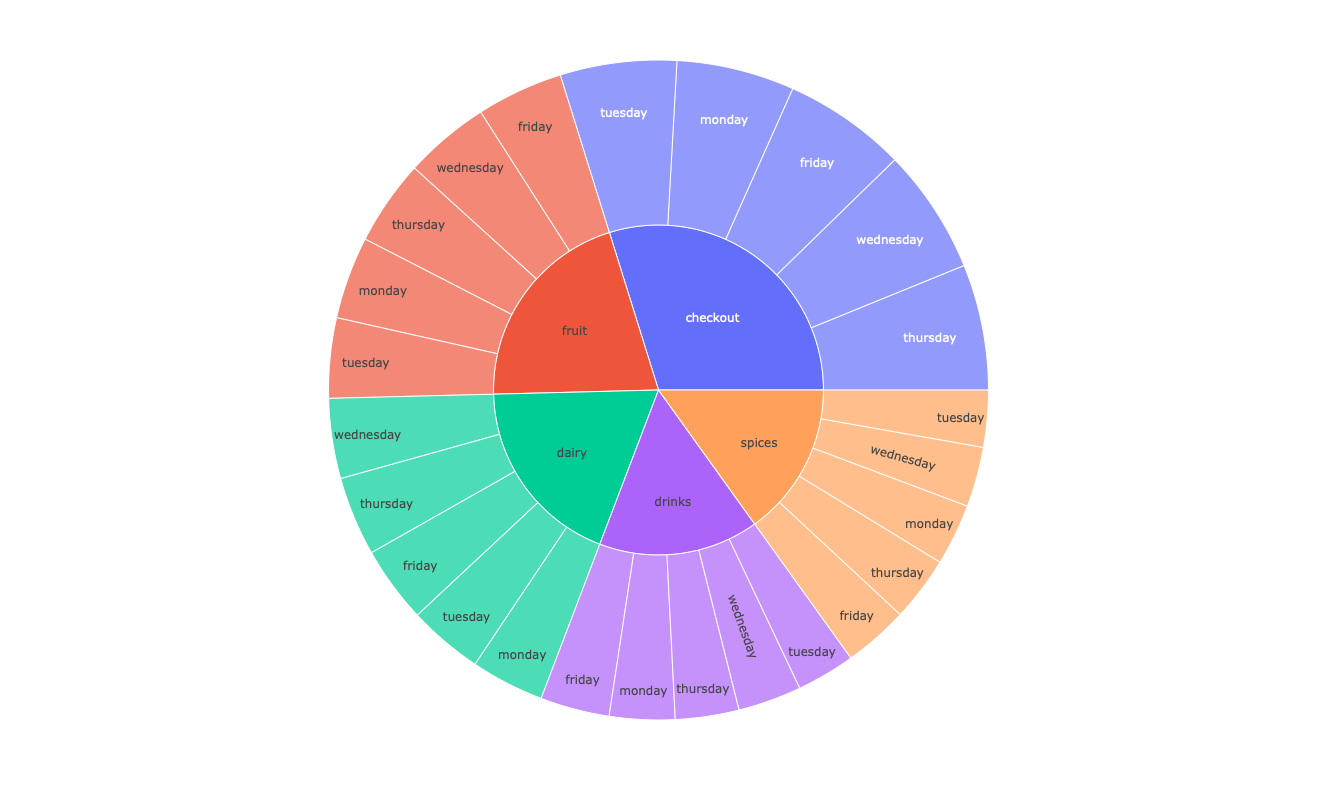

In [8]:
import plotly.express as px
fig = px.sunburst(total_customers, path=['location','weekday'], values='customer_no',height=800)
fig.show()

**Calculate the total number of customers in each section over time**

In [9]:
df_unstack = df.groupby('timestamp')['location'].value_counts().unstack().fillna(0)
df_unstack

location             checkout  dairy  drinks  fruit  spices
timestamp                                                  
2019-09-02 07:03:00       0.0    2.0     0.0    0.0     0.0
2019-09-02 07:04:00       0.0    2.0     0.0    1.0     3.0
2019-09-02 07:05:00       2.0    1.0     1.0    0.0     0.0
2019-09-02 07:06:00       2.0    2.0     1.0    2.0     1.0
2019-09-02 07:07:00       1.0    1.0     1.0    0.0     1.0
...                       ...    ...     ...    ...     ...
2019-09-06 21:46:00       0.0    0.0     1.0    4.0     0.0
2019-09-06 21:47:00       2.0    1.0     0.0    1.0     0.0
2019-09-06 21:48:00       2.0    3.0     0.0    2.0     0.0
2019-09-06 21:49:00       0.0    2.0     1.0    0.0     1.0
2019-09-06 21:50:00       2.0    1.0     1.0    1.0     1.0

[4363 rows x 5 columns]

In [10]:
customers_per_time=pd.DataFrame(df.groupby(['timestamp','location','weekday','hour'])
                                                 ['customer_no'].count()).reset_index()
customers_per_time.head(10)

timestamp  location weekday  hour  customer_no
0 2019-09-02 07:03:00     dairy  monday     7            2
1 2019-09-02 07:04:00     dairy  monday     7            2
2 2019-09-02 07:04:00     fruit  monday     7            1
3 2019-09-02 07:04:00    spices  monday     7            3
4 2019-09-02 07:05:00  checkout  monday     7            2
5 2019-09-02 07:05:00     dairy  monday     7            1
6 2019-09-02 07:05:00    drinks  monday     7            1
7 2019-09-02 07:06:00  checkout  monday     7            2
8 2019-09-02 07:06:00     dairy  monday     7            2
9 2019-09-02 07:06:00    drinks  monday     7            1

[Text(0.5, 1.0, 'total number of customers in each section over time')]

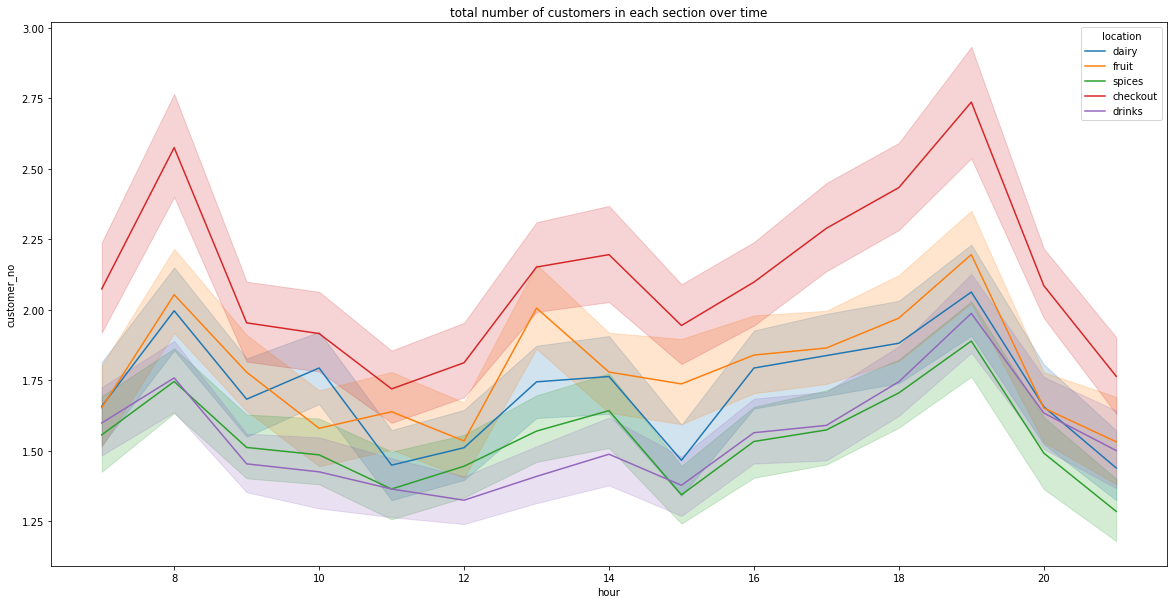

In [11]:
plt.figure(figsize=(20,10))
sns.lineplot(data=customers_per_time,x=customers_per_time['hour'],
              y=customers_per_time['customer_no'],
              hue=customers_per_time['location']).set(title='total number of customers in each section over time')

**Display the number of customers at checkout over time**

In [12]:
customer_at_checkout=customers_per_time[customers_per_time['location']=='checkout']
customer_at_checkout

timestamp  location weekday  hour  customer_no
4     2019-09-02 07:05:00  checkout  monday     7            2
7     2019-09-02 07:06:00  checkout  monday     7            2
12    2019-09-02 07:07:00  checkout  monday     7            1
16    2019-09-02 07:08:00  checkout  monday     7            3
18    2019-09-02 07:09:00  checkout  monday     7            1
...                   ...       ...     ...   ...          ...
13813 2019-09-06 21:37:00  checkout  friday    21            1
13821 2019-09-06 21:45:00  checkout  friday    21            1
13825 2019-09-06 21:47:00  checkout  friday    21            2
13828 2019-09-06 21:48:00  checkout  friday    21            2
13834 2019-09-06 21:50:00  checkout  friday    21            2

[3460 rows x 5 columns]

[Text(0.5, 1.0, 'number of customers at checkout over time')]

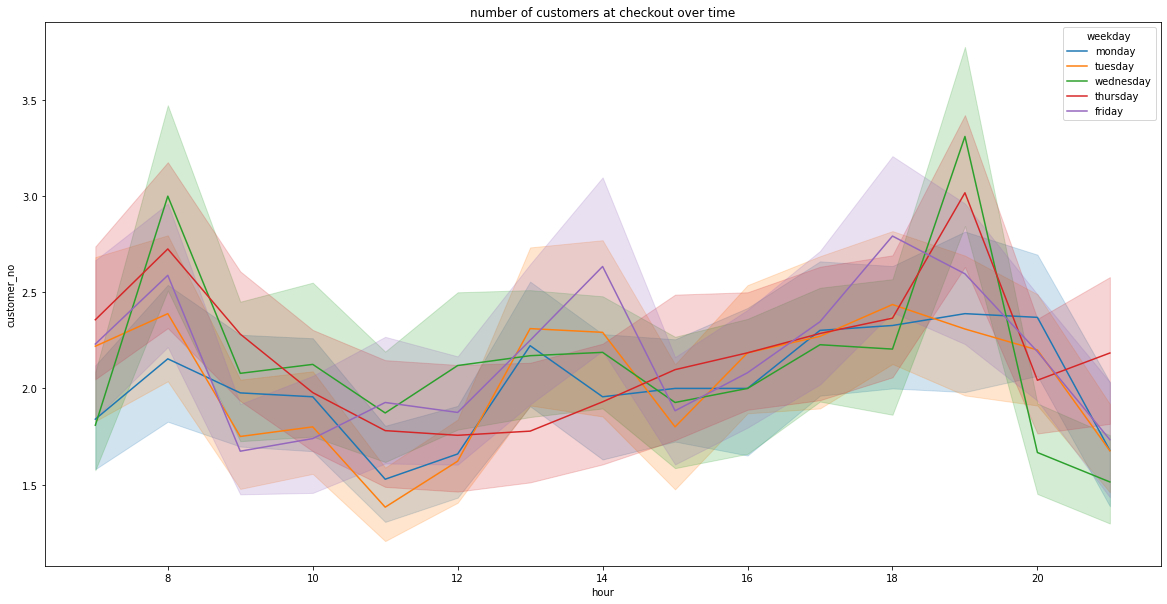

In [13]:
plt.figure(figsize=(20,10))
sns.lineplot(data=customer_at_checkout,x=customer_at_checkout['hour'],
              y=customer_at_checkout['customer_no'],
              hue=customer_at_checkout['weekday']).set(title='number of customers at checkout over time')


**Calculate the time each customer spent in the market**

In [14]:
df1=df[['timestamp','weekday','hour','location','customer_no']]
df1['uniqueID']=df['weekday']+df['customer_no'].astype(str)
#df1 = df1.sort_values(['customer_no', 'timestamp']).reset_index()
#df1['timespent'] = df1.groupby('customer_no')['timestamp'].diff().reset_index()

In [15]:
df1 = df1.sort_values(['customer_no','timestamp']).reset_index()
df1['timespent'] = df1.groupby('uniqueID')['timestamp'].diff()

In [16]:
df1=pd.DataFrame(df1)

In [17]:
df1

index           timestamp   weekday  hour  \
0     1970-01-01 00:00:00.000000000 2019-09-02 07:03:00    monday     7   
1     1970-01-01 00:00:00.000000008 2019-09-02 07:05:00    monday     7   
2     1970-01-01 00:00:00.000000000 2019-09-03 07:02:00   tuesday     7   
3     1970-01-01 00:00:00.000000003 2019-09-03 07:05:00   tuesday     7   
4     1970-01-01 00:00:00.000000025 2019-09-03 07:12:00   tuesday     7   
...                             ...                 ...       ...   ...   
24872 1970-01-01 00:00:00.000005099 2019-09-05 21:48:00  thursday    21   
24873 1970-01-01 00:00:00.000005100 2019-09-05 21:48:00  thursday    21   
24874 1970-01-01 00:00:00.000005102 2019-09-05 21:49:00  thursday    21   
24875 1970-01-01 00:00:00.000005101 2019-09-05 21:48:00  thursday    21   
24876 1970-01-01 00:00:00.000005103 2019-09-05 21:49:00  thursday    21   

       location  customer_no      uniqueID       timespent  
0         dairy            1       monday1             NaT  
1      checkout            1       monday1 0 days 00:02:00  
2         fruit            1      tuesday1             NaT  
3        drinks            1      tuesday1 0 days 00:03:00  
4      checkout            1      tuesday1 0 days 00:07:00  
...         ...          ...           ...             ...  
24872     dairy         1533  thursday1533             NaT  
24873     fruit         1534  thursday1534             NaT  
24874  checkout         1534  thursday1534 0 days 00:01:00  
24875    spices         1535  thursday1535             NaT  
24876  checkout         1535  thursday1535 0 days 00:01:00  

[24877 rows x 8 columns]

In [18]:
df1['uniqueID'].unique()

array(['monday1', 'tuesday1', 'wednesday1', ..., 'thursday1533',
       'thursday1534', 'thursday1535'], dtype=object)

In [19]:
df1[df1['uniqueID']=='friday2']

index           timestamp weekday  hour  location  \
22 1970-01-01 00:00:00.000000001 2019-09-06 07:00:00  friday     7    drinks   
23 1970-01-01 00:00:00.000000003 2019-09-06 07:01:00  friday     7  checkout   

    customer_no uniqueID       timespent  
22            2  friday2             NaT  
23            2  friday2 0 days 00:01:00

In [20]:
time_spent_in_market= df1.groupby(['weekday','uniqueID'])['timestamp'].apply(lambda x: x.max() - x.min()).dt.seconds/60
time_spent_in_market=pd.DataFrame(time_spent_in_market).reset_index()
time_spent_in_market

weekday      uniqueID  timestamp
0        friday       friday1        5.0
1        friday      friday10        5.0
2        friday     friday100        1.0
3        friday    friday1000        1.0
4        friday    friday1001       10.0
...         ...           ...        ...
7440  wednesday  wednesday995       28.0
7441  wednesday  wednesday996       11.0
7442  wednesday  wednesday997       22.0
7443  wednesday  wednesday998        6.0
7444  wednesday  wednesday999        1.0

[7445 rows x 3 columns]

In [21]:
time_spent_in_market[time_spent_in_market['uniqueID']=='monday1']

weekday uniqueID  timestamp
1510  monday  monday1        2.0

**Calculate the total number of customers in the supermarket over time.**

In [22]:
dff=df[['year','month','week','weekday','hour','minutes','customer_no']]
dff['uniqueID']=df['weekday']+df['customer_no'].astype(str)
dff.drop_duplicates(subset='uniqueID', keep="last",inplace=True)

In [23]:
dff['totalcustomers'] = np.where(dff.uniqueID.is_unique,dff.uniqueID.is_unique,1)

In [24]:
dff.reset_index()

index  year  month  week weekday  hour  minutes  \
0    1970-01-01 00:00:00.000000008  2019      9    36  monday     7        5   
1    1970-01-01 00:00:00.000000009  2019      9    36  monday     7        5   
2    1970-01-01 00:00:00.000000013  2019      9    36  monday     7        6   
3    1970-01-01 00:00:00.000000012  2019      9    36  monday     7        6   
4    1970-01-01 00:00:00.000000020  2019      9    36  monday     7        7   
...                            ...   ...    ...   ...     ...   ...      ...   
7440 1970-01-01 00:00:00.000005121  2019      9    36  friday    21       50   
7441 1970-01-01 00:00:00.000005123  2019      9    36  friday    21       50   
7442 1970-01-01 00:00:00.000005119  2019      9    36  friday    21       50   
7443 1970-01-01 00:00:00.000005120  2019      9    36  friday    21       50   
7444 1970-01-01 00:00:00.000005124  2019      9    36  friday    21       50   

      customer_no    uniqueID  totalcustomers  
0               1     monday1               1  
1               5     monday5               1  
2               3     monday3               1  
3               2     monday2               1  
4               8     monday8               1  
...           ...         ...             ...  
7440         1507  friday1507               1  
7441         1509  friday1509               1  
7442         1496  friday1496               1  
7443         1500  friday1500               1  
7444         1510  friday1510               1  

[7445 rows x 10 columns]

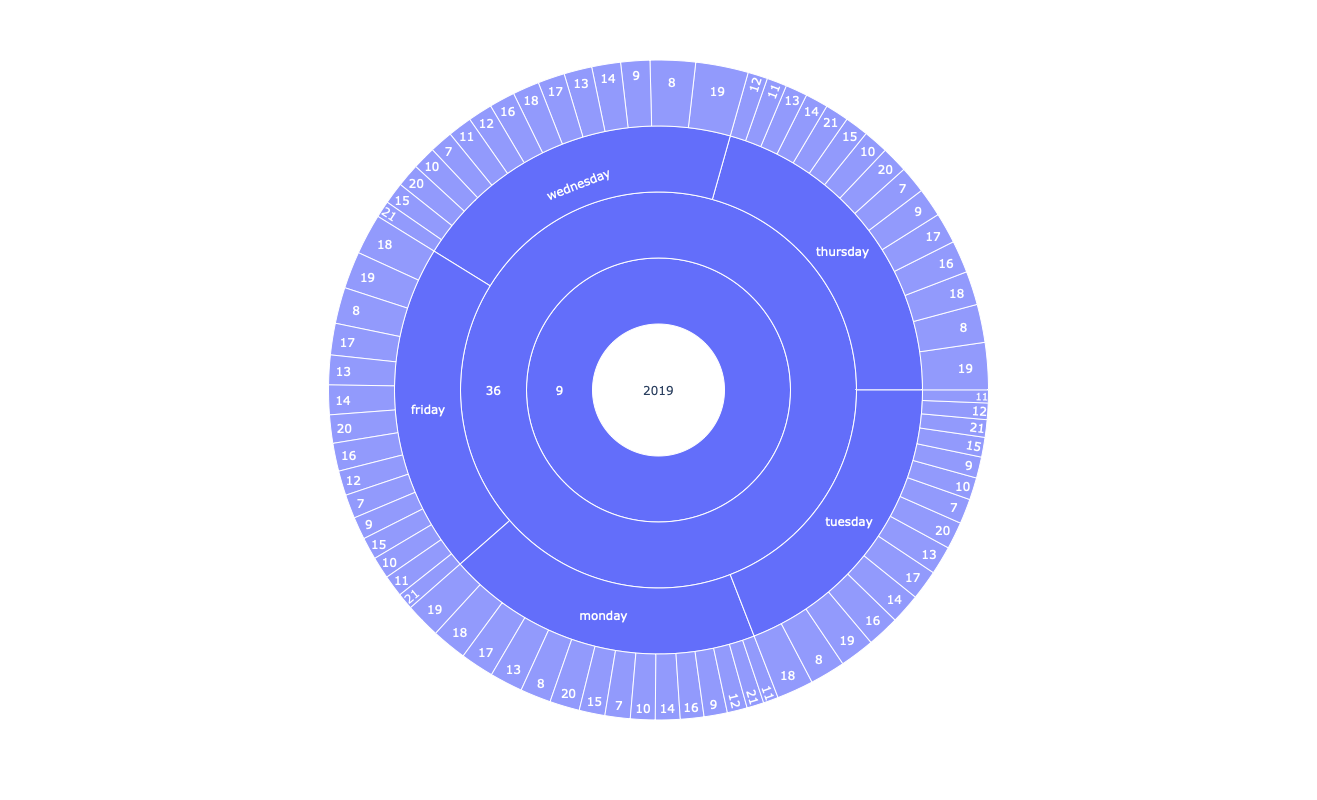

In [25]:
fig = px.sunburst(dff, path=['year','month','week','weekday','hour'], values='totalcustomers',height=800)
fig.show()

### Estimate the total revenue per customer

In [26]:
revenues = pd.DataFrame(
    {"location": ["fruit", "spices", "dairy", "drinks"], "revenue": [4, 3, 5, 6]}
)
revenues

location  revenue
0    fruit        4
1   spices        3
2    dairy        5
3   drinks        6

In [27]:
df1.location.isna().sum()

0

In [28]:
df1.loc[df1["location"] == "fruit", "revenue"] = "4"
df1.loc[df1["location"] == "spices", "revenue"] = "3"
df1.loc[df1["location"] == "dairy", "revenue"] = "5"
df1.loc[df1["location"] == "drinks", "revenue"] = "6"
df1.loc[df1["location"] == "checkout", "revenue"] = "0"

In [29]:
df1["revenue"] = df1["revenue"].astype(int)

In [30]:
df1.groupby("uniqueID")[["revenue"]].sum().sort_values(
    "revenue", ascending=False)

revenue
uniqueID             
friday102          72
monday526          72
thursday1047       72
friday1246         68
monday380          64
...               ...
friday268           3
friday27            3
tuesday255          3
monday668           3
monday1444          3

[7445 rows x 1 columns]

### Which is the most profitable section according to your data?

In [31]:
df1.groupby("location")[["revenue"]].sum().sort_values(
    "revenue", ascending=False
)

revenue
location         
drinks      23430
dairy       23395
fruit       20488
spices      11262
checkout        0

**Markov Chain Monte Carlo Simulation (MCMC) 🎲**

**Transition Matrix**

In [32]:
dtt=df[['timestamp','weekday','hour','customer_no','location']]
dtt['uniqueID']=dtt['weekday']+dtt['customer_no'].astype(str)
dtt = dtt.sort_values(['uniqueID','timestamp'],ascending=True)
dtt = dtt.reindex(columns=['timestamp','weekday','hour','customer_no','uniqueID','location'])
dtt=dtt.set_index('timestamp')
dtt

weekday  hour  customer_no      uniqueID  location
timestamp                                                                
2019-09-06 07:00:00     friday     7            1       friday1     dairy
2019-09-06 07:04:00     friday     7            1       friday1    spices
2019-09-06 07:05:00     friday     7            1       friday1  checkout
2019-09-06 07:06:00     friday     7           10      friday10     fruit
2019-09-06 07:11:00     friday     7           10      friday10  checkout
...                        ...   ...          ...           ...       ...
2019-09-04 16:53:00  wednesday    16          998  wednesday998     dairy
2019-09-04 16:57:00  wednesday    16          998  wednesday998     fruit
2019-09-04 16:59:00  wednesday    16          998  wednesday998  checkout
2019-09-04 16:53:00  wednesday    16          999  wednesday999     fruit
2019-09-04 16:54:00  wednesday    16          999  wednesday999  checkout

[24877 rows x 5 columns]

In [33]:
dtt_resampled=dtt.groupby('uniqueID').resample('1T').ffill()           #resampling to get timestamp for each minute per customer
dtt_resampled.drop(columns=['uniqueID'], inplace=True)
dtt_resampled


weekday  hour  customer_no  location
uniqueID     timestamp                                                  
friday1      2019-09-06 07:00:00     friday     7            1     dairy
             2019-09-06 07:01:00     friday     7            1     dairy
             2019-09-06 07:02:00     friday     7            1     dairy
             2019-09-06 07:03:00     friday     7            1     dairy
             2019-09-06 07:04:00     friday     7            1    spices
...                                     ...   ...          ...       ...
wednesday998 2019-09-04 16:57:00  wednesday    16          998     fruit
             2019-09-04 16:58:00  wednesday    16          998     fruit
             2019-09-04 16:59:00  wednesday    16          998  checkout
wednesday999 2019-09-04 16:53:00  wednesday    16          999     fruit
             2019-09-04 16:54:00  wednesday    16          999  checkout

[53903 rows x 4 columns]

In [34]:

dtt_resampled['next_location']= dtt_resampled.groupby('uniqueID')['location'].shift(-1)
dtt_resampled['next_location'].fillna(value='checkout', inplace=True)
dtt_resampled

weekday  hour  customer_no  location  \
uniqueID     timestamp                                                     
friday1      2019-09-06 07:00:00     friday     7            1     dairy   
             2019-09-06 07:01:00     friday     7            1     dairy   
             2019-09-06 07:02:00     friday     7            1     dairy   
             2019-09-06 07:03:00     friday     7            1     dairy   
             2019-09-06 07:04:00     friday     7            1    spices   
...                                     ...   ...          ...       ...   
wednesday998 2019-09-04 16:57:00  wednesday    16          998     fruit   
             2019-09-04 16:58:00  wednesday    16          998     fruit   
             2019-09-04 16:59:00  wednesday    16          998  checkout   
wednesday999 2019-09-04 16:53:00  wednesday    16          999     fruit   
             2019-09-04 16:54:00  wednesday    16          999  checkout   

                                 next_location  
uniqueID     timestamp                          
friday1      2019-09-06 07:00:00         dairy  
             2019-09-06 07:01:00         dairy  
             2019-09-06 07:02:00         dairy  
             2019-09-06 07:03:00        spices  
             2019-09-06 07:04:00      checkout  
...                                        ...  
wednesday998 2019-09-04 16:57:00         fruit  
             2019-09-04 16:58:00      checkout  
             2019-09-04 16:59:00      checkout  
wednesday999 2019-09-04 16:53:00      checkout  
             2019-09-04 16:54:00      checkout  

[53903 rows x 5 columns]

In [35]:
transition_prob_matrix=pd.crosstab(dtt_resampled['location'],dtt_resampled['next_location'], normalize=0)


<AxesSubplot:xlabel='next_location', ylabel='location'>

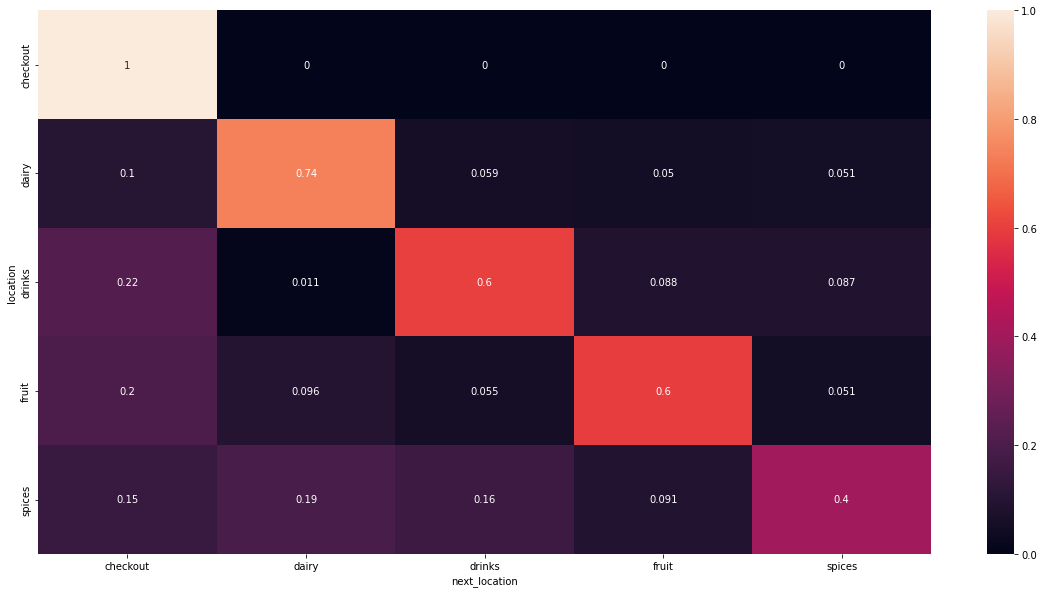

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(transition_prob_matrix,annot=True, fmt=".2g")
plt.title("Transition Probability Matrix)

### get customer class

In [37]:
class Customer:
    """
    a single customer that moves through the supermarket
    in a MCMC simulation
    """
    def __init__(self, name, state, budget=100):
        self.name = name
        self.state = state
        self.budget = budget
    def __repr__(self):
        return f'customer_no {self.name} {self.state}'
    def next_state(self):
        '''
        Propagates the customer to the next state.
        Returns nothing.
        '''
        self.state = random.choices(['checkout', 'dairy', 'drinks', 'fruit', 'spices'], list(transition_prob_matrix.loc[self.state]) )
        self.state = self.state[0]
        
        
    def is_active(self):
        
        if self.state == 'checkout':
            return True

### get supermarket class

In [38]:
class Supermarket:
    
    """manages multiple Customer instances that are currently in the market."""

    def __init__(self,market_name,opening,closing): 
        self.market_name = market_name
        self.opening = opening
        self.closing = closing
        self.customers = []
        self.current_time = 0
        self.index=0
        self.customer_index =0
        self.state = None
        self.dti = pd.date_range(self.opening, self.closing, freq="T").time
        
        
    def __repr__(self):
        return f'{sefl.market_name}'
    
    def is_open(self):
        if self.index <= len(self.dti)-2:
            return datetime.strptime(self.opening, '%H:%M:%S') <= datetime.strptime(self.get_time(), '%H:%M:%S') <= datetime.strptime(self.closing, '%H:%M:%S')

    def get_time(self):
        """current time in HH:MM format,"""
        self.current_time = str(self.dti[self.index])
        return self.current_time
        
    def print_customers(self):
        """print all customers with the current time and id in CSV format.
        """
        return self.customers

    def next_minute(self):
        """"propagates all customers to the next state."""
        
        self.index += 1
        next_time = self.dti[self.index] 
        
        for customer in self.customers:
            customer.next_state()

            
    def add_new_customers(self):
        """randomly creates new customers.
        """
        self.state = random.choices(['dairy', 'drinks', 'fruit', 'spices'])
        self.state = self.state[0]
        self.customer_index +=1
        new_customer = Customer(self.customer_index,self.state)
        self.customers.append(new_customer)
        

    def remove_exitsting_customers(self):
        """removes every customer that is not active any more.
        """
        for customer in self.customers:
            if customer.is_active():
                self.customers.remove(customer)

### market simulaion per minute

In [39]:
#initialization for the while-loop
a = Supermarket('Marketsimulation','07:00:00','22:00:00')
Marketsimulation = pd.DataFrame()

while a.is_open():    
    a.add_new_customers()
    for customer in a.customers:
        Marketsimulation = Marketsimulation.append({'time': a.get_time(), 
                                                'customer_no': str(customer.name),
                                                'location': customer.state
                                               },ignore_index=True)
    
    a.remove_exitsting_customers()
    a.next_minute()
    
Marketsimulation.set_index('time', inplace=True)
Marketsimulation.head()   

customer_no location
time                         
07:00:00           1    dairy
07:01:00           1    dairy
07:01:00           2   spices
07:02:00           1    dairy
07:02:00           2    dairy

In [40]:
Marketsimulation.to_csv('./Marketsimulation.csv')